# Load Packages


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
tf.debugging.set_log_device_placement(True)




1 Physical GPUs, 1 Logical GPUs


# Import the dataset

In [6]:
df = pd.read_csv ("glass.csv")
df2 = df.set_index('Type')
features = df.columns[:-1].tolist()
df2.head()
print (df2.head(10))
print (features)

           RI     Na    Mg    Al     Si     K    Ca   Ba    Fe
Type                                                          
1     1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00
1     1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00
1     1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00
1     1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00
1     1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00
1     1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26
1     1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00
1     1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00
1     1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00
1     1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11
['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


# Checking Data Types

In [7]:
print (df2.dtypes)

RI    float64
Na    float64
Mg    float64
Al    float64
Si    float64
K     float64
Ca    float64
Ba    float64
Fe    float64
dtype: object


# checking rows for duplicate data

In [8]:
duplicate_rows_df = df2[df2.duplicated()]
print("number of duplicated rows: ", duplicate_rows_df.shape)
print (duplicate_rows_df)

number of duplicated rows:  (1, 9)
           RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
Type                                                         
1     1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0


# remove duplicated rows

In [9]:
df2 = df2.drop_duplicates()
duplicate_rows_df = df2[df2.duplicated()]
print("number of duplicated rows: ", duplicate_rows_df.shape)
 


number of duplicated rows:  (0, 9)


# count the number of null values in each column

In [10]:
print(df2.isnull().sum())

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64


# print summary statictics

In [11]:
df2.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


# check the distribution of types

In [12]:
df['Type'].value_counts()


2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# check the distribution of the features individually

In [13]:
for feat in features: 
    print (df[feat])

0      1.52101
1      1.51761
2      1.51618
3      1.51766
4      1.51742
        ...   
209    1.51623
210    1.51685
211    1.52065
212    1.51651
213    1.51711
Name: RI, Length: 214, dtype: float64
0      13.64
1      13.89
2      13.53
3      13.21
4      13.27
       ...  
209    14.14
210    14.92
211    14.36
212    14.38
213    14.23
Name: Na, Length: 214, dtype: float64
0      4.49
1      3.60
2      3.55
3      3.69
4      3.62
       ... 
209    0.00
210    0.00
211    0.00
212    0.00
213    0.00
Name: Mg, Length: 214, dtype: float64
0      1.10
1      1.36
2      1.54
3      1.29
4      1.24
       ... 
209    2.88
210    1.99
211    2.02
212    1.94
213    2.08
Name: Al, Length: 214, dtype: float64
0      71.78
1      72.73
2      72.99
3      72.61
4      73.08
       ...  
209    72.61
210    73.06
211    73.42
212    73.61
213    73.36
Name: Si, Length: 214, dtype: float64
0      0.06
1      0.48
2      0.39
3      0.57
4      0.55
       ... 
209    0.08
210    0.00

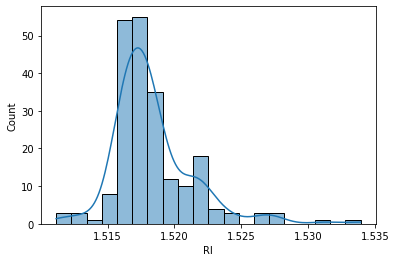

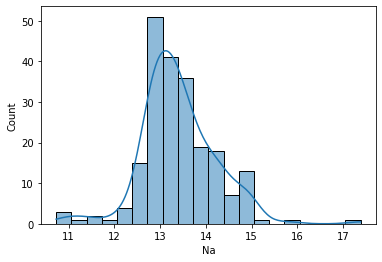

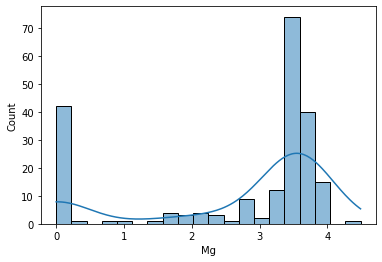

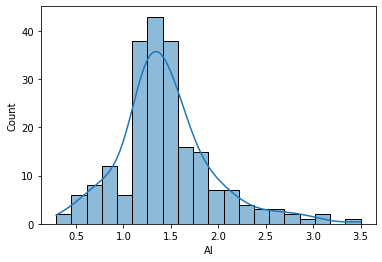

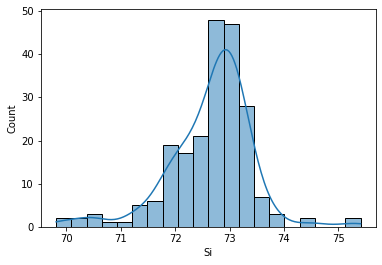

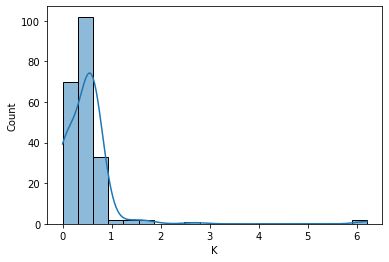

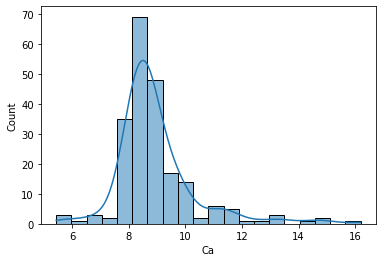

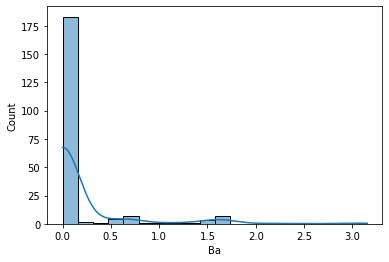

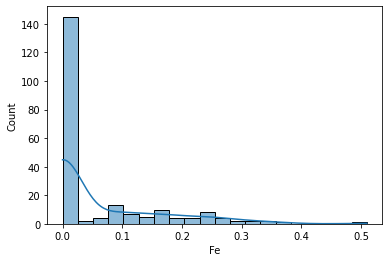

In [16]:

for feat in features:    
    skew = df[feat].skew()
    sns.histplot(df[feat], kde=True, bins=20, label='Skew '%(skew))
    plt.show()



# Create a pairplot of the data

In [ ]:
p=sns.pairplot(df, hue='Type')

# Display Refractive Index

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['RI'], ax = axes[0])
axes[0].set_xlabel('Refractive Index', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'RI', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Refractive Index', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Sodium

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Na'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Na', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Magnesium

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Mg'], ax = axes[0])
axes[0].set_xlabel('Magnesium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Mg', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Magnesium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Aluminium

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Al'], ax = axes[0])
axes[0].set_xlabel('Aluminum', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Al', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Aluminum', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Silicon

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Si'], ax = axes[0])
axes[0].set_xlabel('Silicon', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Si', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Silicon', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Potassium

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['K'], ax = axes[0])
axes[0].set_xlabel('Potassium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'K', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Potassium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Calcium

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Ca'], ax = axes[0])
axes[0].set_xlabel('Calcium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Ca', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Calcium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Barium

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Ca'], ax = axes[0])
axes[0].set_xlabel('Barium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Ca', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Barium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Iron

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['Fe'], ax = axes[0])
axes[0].set_xlabel('Iron', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Fe', data = df, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Iron', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

# Extract Labels to a different data frame.

In [17]:
x_training = df.drop('Type', axis = 1)
y_training = df['Type']
print(y_training.shape)

(214,)


# Plot the training set

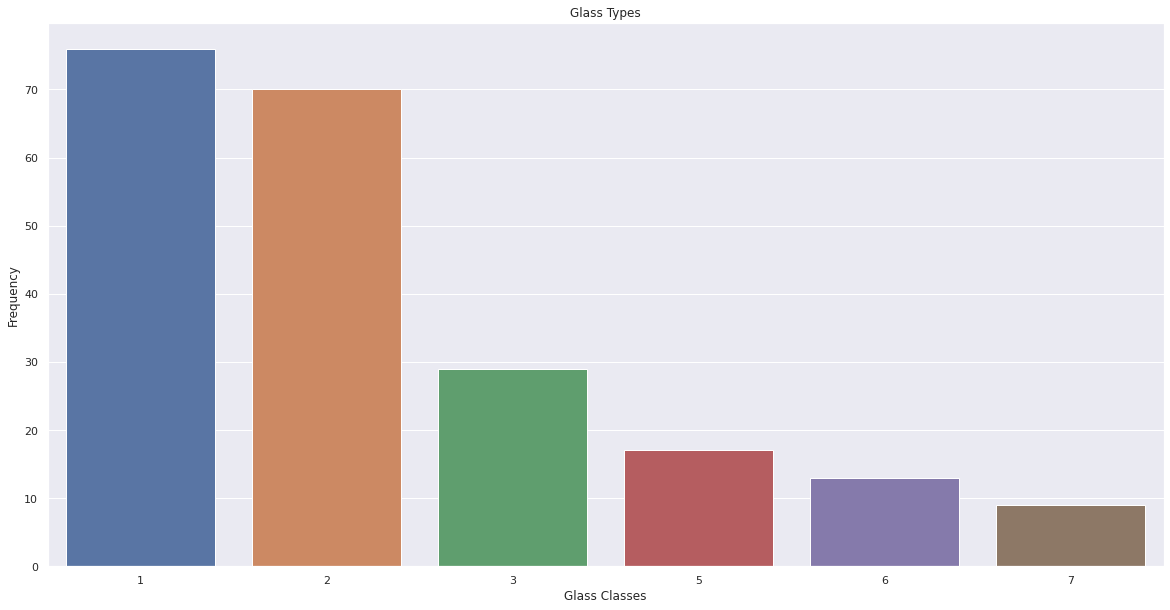

In [18]:
ybar= df['Type']
glass= ybar.unique()
values = ybar.value_counts()
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x=glass, y=values)
plt.title("Glass Types")
plt.xlabel("Glass Classes")
plt.ylabel("Frequency")
plt.show()

# explore data values

In [19]:
x_training.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


# convert data to use with keras for normalisation

In [20]:
x = df.values
x_norm = normalize(x)
print (x[0])
print (x_norm[0])


[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
 8.75000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
[2.06227172e-02 1.84938864e-01 6.08779693e-02 1.49144245e-02
 9.73233994e-01 8.13514066e-04 1.18637468e-01 0.00000000e+00
 0.00000000e+00 1.35585678e-02]


# convert label 

In [21]:
y_training = to_categorical(y_training)
y_training.shape


(214, 8)

# Split the data for training

In [22]:
x_norm, x_val, y_training, y_val = train_test_split(x_norm, y_training, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5)

# visualise the data in a heatmap

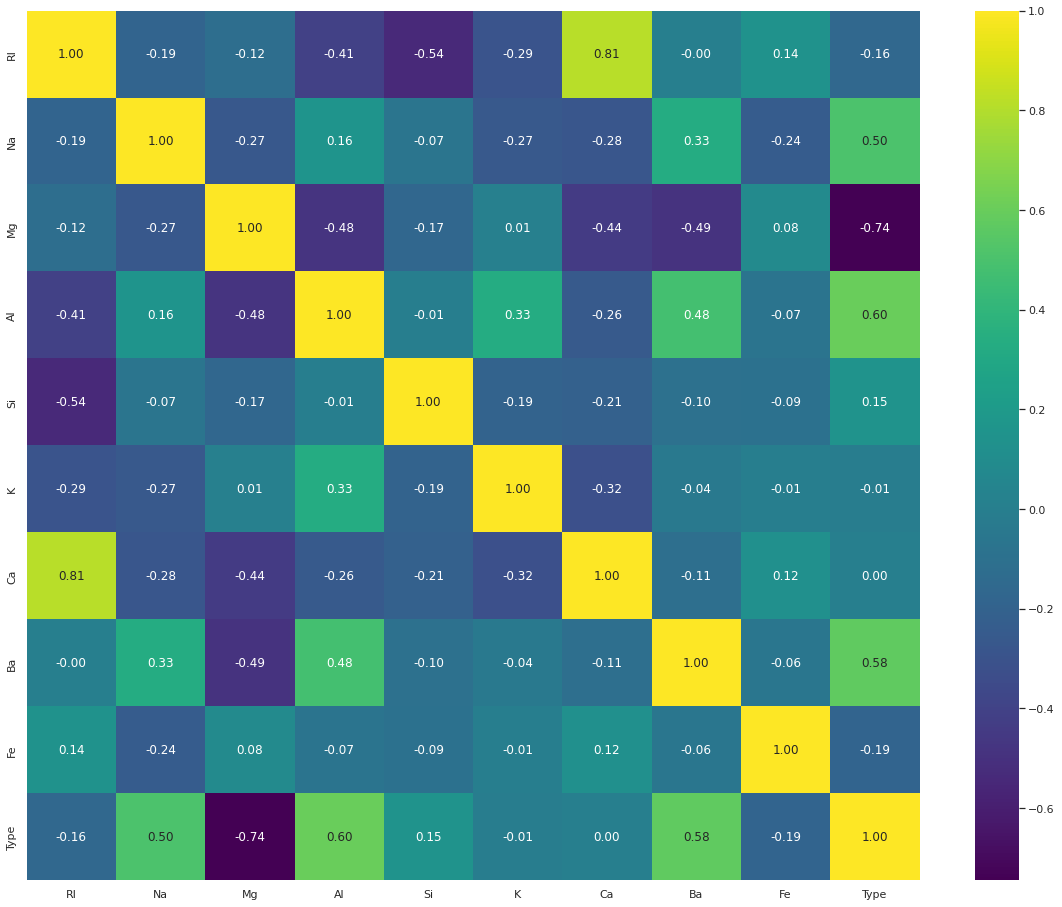

In [23]:
corr =df.corr()

fig, ax =plt.subplots(figsize=(20,16))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='viridis', annot=True, fmt='.2f')
#Apply xticks

#show plot
plt.show()

# Create the model

In [136]:
with tf.device('/gpu:0'):
    model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(64, input_shape=(10,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.5),
            
    tf.keras.layers.Dense(8, activation='softmax')
])

with tf.device('/cpu:0'):

    model.compile(loss='categorical_hinge',
              optimizer=Adam(0.0001),
              metrics=['acc'])

    model
    

In [120]:
!cnn

/bin/bash: line 1: cnn: command not found


# view the model

In [137]:
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization_54 (Batc (None, 64)                256       
_________________________________________________________________
dense_78 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_55 (Batc (None, 128)               512       
_________________________________________________________________
dense_79 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_56 (Batc (None, 256)               1024      
_________________________________________________________________
dense_80 (Dense)             (None, 8)               

# train the model

In [150]:
tf.debugging.set_log_device_placement(True)

with tf.device('/device:GPU:0'):
    
    history = model.fit(x_norm, y_training,
                    epochs=500,
                    validation_data=(x_val, y_val),
                    verbose=2,
                    # batch_size=256,
                    workers=8,
                    use_multiprocessing=True,
                                       
                   )



Epoch 1/500
6/6 - 0s - loss: 7.2194e-04 - acc: 1.0000 - val_loss: 0.0946 - val_acc: 0.9524
Epoch 2/500
6/6 - 0s - loss: 4.0857e-05 - acc: 1.0000 - val_loss: 0.0946 - val_acc: 0.9524
Epoch 3/500
6/6 - 0s - loss: 5.3852e-05 - acc: 1.0000 - val_loss: 0.0946 - val_acc: 0.9524
Epoch 4/500
6/6 - 0s - loss: 1.8149e-04 - acc: 1.0000 - val_loss: 0.0946 - val_acc: 0.9524
Epoch 5/500
6/6 - 0s - loss: 1.8457e-04 - acc: 1.0000 - val_loss: 0.0946 - val_acc: 0.9524
Epoch 6/500
6/6 - 0s - loss: 1.4160e-04 - acc: 1.0000 - val_loss: 0.0946 - val_acc: 0.9524
Epoch 7/500
6/6 - 0s - loss: 8.7102e-05 - acc: 1.0000 - val_loss: 0.0947 - val_acc: 0.9524
Epoch 8/500
6/6 - 0s - loss: 4.1002e-05 - acc: 1.0000 - val_loss: 0.0947 - val_acc: 0.9524
Epoch 9/500
6/6 - 0s - loss: 4.7933e-05 - acc: 1.0000 - val_loss: 0.0947 - val_acc: 0.9524
Epoch 10/500
6/6 - 0s - loss: 5.0000e-05 - acc: 1.0000 - val_loss: 0.0948 - val_acc: 0.9524
Epoch 11/500
6/6 - 0s - loss: 8.0169e-05 - acc: 1.0000 - val_loss: 0.0948 - val_acc: 0.95

# Evaluate the model

# Display Model Accuracy

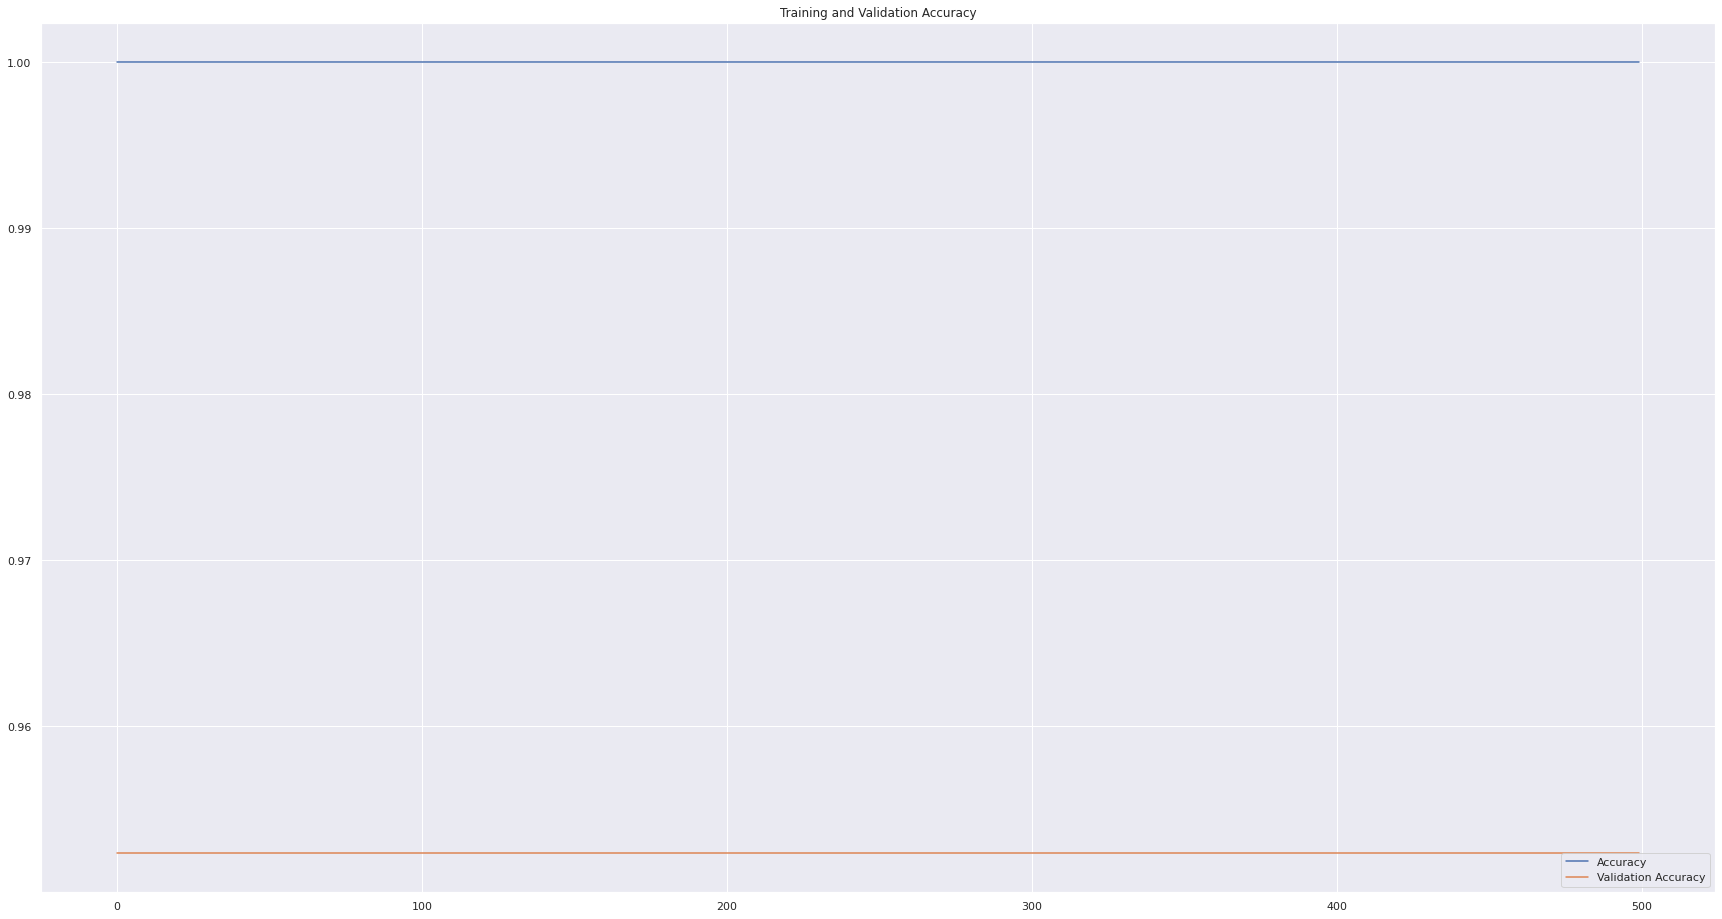

In [149]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,16)})
sns.lineplot(x=history.epoch, y=history.history['acc'], label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

# Display Model Accuracy

In [124]:

accuracy = history.history['acc'][-1]*100
val_accuracy = history.history['val_acc'][-1]*100
print ("Accuracy:", round(accuracy,3), "%")
print ("Validation Accuracy:", round(val_accuracy,3), "%")



Accuracy: 100.0 %
Validation Accuracy: 57.143 %


AttributeError: 'dict' object has no attribute 'tolist'

# Display model loss

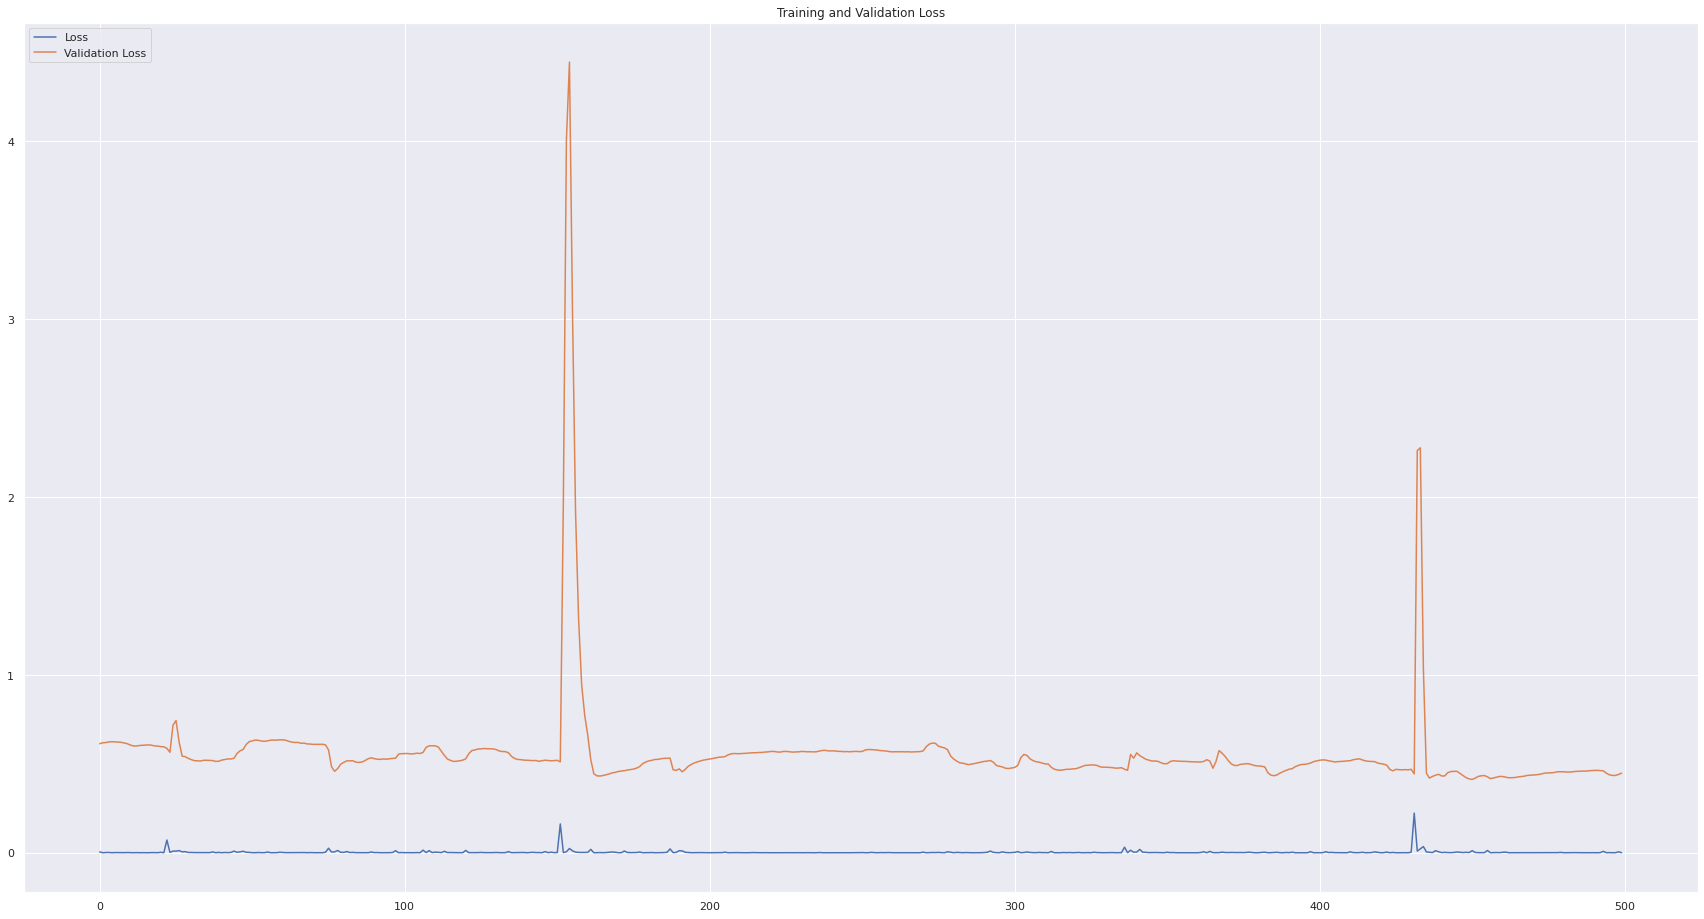

In [133]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,16)})
sns.lineplot(x=history.epoch, y=history.history['loss'], label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper left')



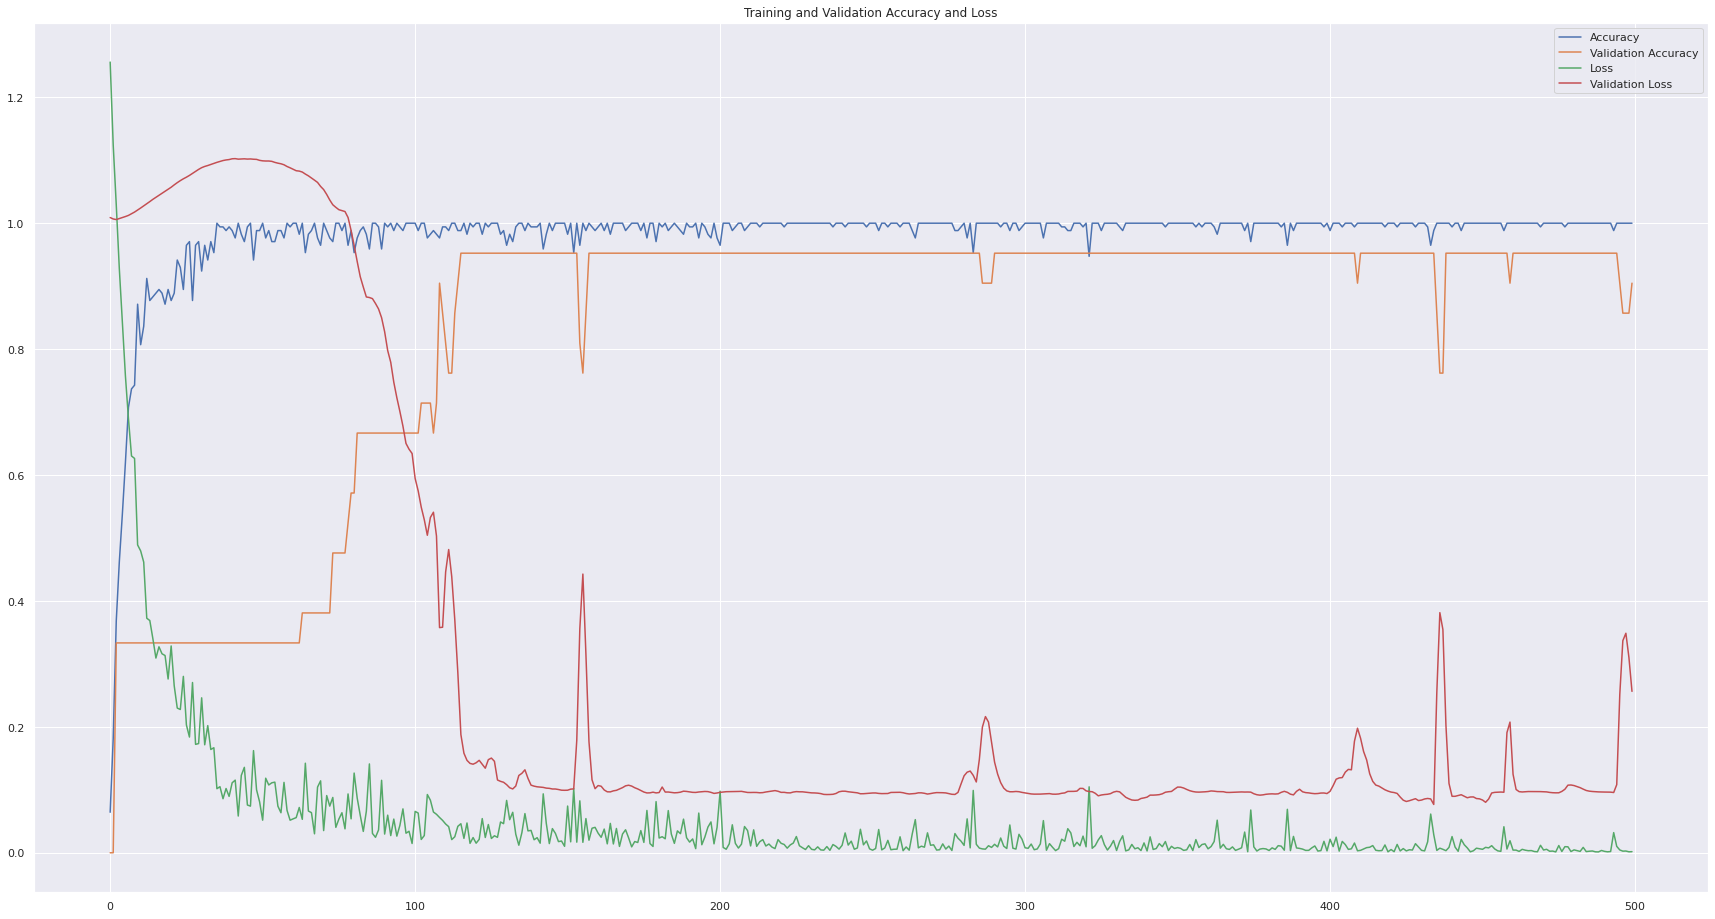

In [140]:
#add a lineplot from seaborn
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,16)})
sns.lineplot(x=history.epoch, y=history.history['acc'], label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_acc'], label='Validation Accuracy')
sns.lineplot(x=history.epoch, y=history.history['loss'], label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy and Loss')
plt.legend(loc='upper right')



# Evaluate on the test data

In [62]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 8ms/step - loss: 1.4740 - acc: 1.0000


[1.4740122556686401, 1.0]

# Display the best model accuracy

In [63]:
best_model_accuracy = history.history['acc'][np.argmin(history.history['loss'])]*100
print ("Best Model Accuracy:", round(best_model_accuracy, 3), "%")

Best Model Accuracy: 100.0 %


# confusion matrix

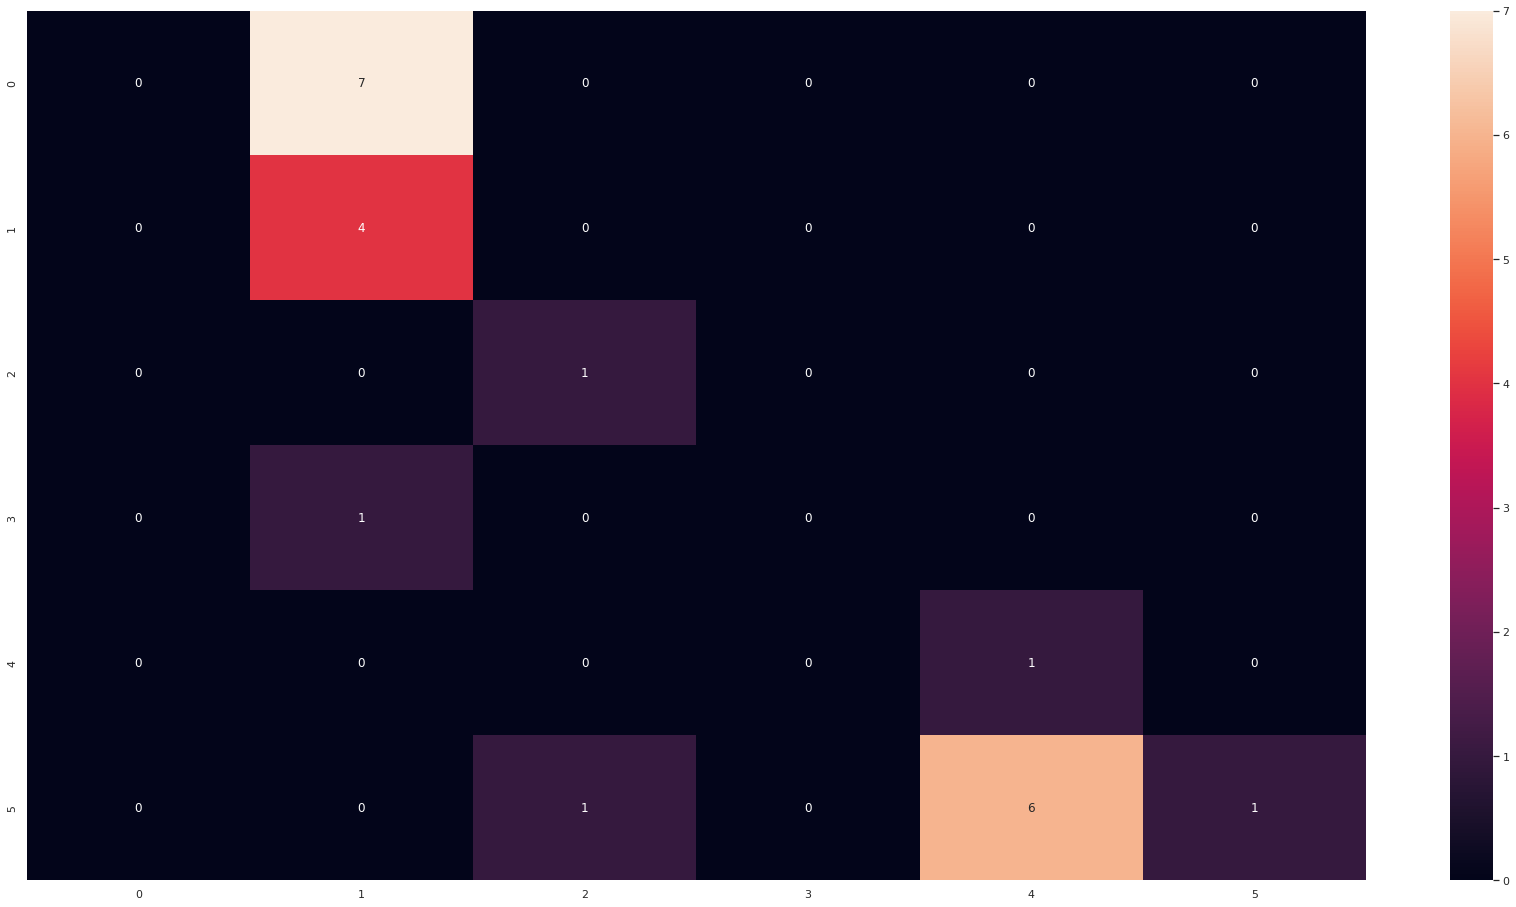

In [106]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

sns.heatmap(confusion_matrix(y_true, y_pred_classes),annot=True,fmt="d")
plt.show()